# Growth of fox and rabbit population in a forest problem

For this problem you are going to simulate growth of fox and rabbit population in a forest! The following facts are true about the fox and rabbit population:

 * The maximum population of rabbits is determined by the amount of vegetation in the forest, which is relatively stable. There are never fewer than 10 rabbits; the maximum population of rabbits is 1000.
 * For each rabbit during each time step, a new rabbit will be born with a probability of p<sub>rabbit</sub> reproduction:
 
 $$p_{rabbit\ reproduction} = 1.0 - \frac{current\ rabbit\ population}{max\ rabbit\ population}$$
 
   In other words, when the current population is near the maximum, the probability of giving birth is very low, and when the current population is small, the probability of giving birth is very high.
 * The population of foxes is constrained by number of rabbits. There are never fewer than 10 foxes.
 * At each time step, after the rabbits have finished reproducing, a fox will try to hunt a rabbit with success rate of pfox eats rabbit:
 
 $$p_{fox\ eats\ rabbit} = \frac{current\ rabbit\ population}{max\ rabbit\ population}$$
 
   In other words, the more rabbits, the more likely a fox will eat one.
 * If a fox succeeds in hunting, it will decrease the number of rabbits by 1 immediately. Remember that the population of rabbits is never lower than 10. Additionally, if a fox succeeds in hunting, then it has a 1/3 probability of giving birth in the current time-step. If a fox fails in hunting then it has a 10 percent chance of dying in the current time-step. If the starting population is below 10 then you should do nothing. You should not increase the population nor set the population to 10. 

Start with 500 rabbits and 30 foxes. At the end of each time step, record the number of foxes and rabbits. Run the simulation for 200 time steps, and then plot the population of rabbits and the population of foxes as a function of time step. (You do not need to paste your code for plotting for Part A of this problem).

Use the following steps, and the template file `exam_problem3.py`, as guides in your implementation of this simulation.

**Step 1**: Write the procedure, `rabbitGrowth`, that updates the number of rabbits during the first part of a time step

**Step 2**: Write the procedure, `foxGrowth`, that updates the number of rabbits and foxes during the second part of a time step

**Step 3**: Write the master procedure, `runSimulation`, that loops for some amount of time steps, doing the first part and then the second part of the simulation. Record the two populations in two different lists, and return those lists.

Paste your code for the three functions `rabbitGrowth`, `foxGrowth`, and runSimulation in the following box.

**WARNING**

**DO NOT** define the global variables `MAXRABBITPOP`, `CURRENTRABBITPOP`, or `CURRENTFOXPOP` in this box. We alter the values of these variables to test your code. If you define the variables in this box, you may overwrite our values, causing your code to be marked incorrect.

**CLARIFICATIONS / HINTS**

 * "See Full Output": If you are getting the line "0 10" in your output for "Test 4 foxGrowth" then for this particular test, your code changes the CURRENTFOXPOP (increases it if the fox population has gone below the minimum fox population), which is not the right behavior -- the code should not reset CURRENTFOXPOP.
 * It is not correct to assume that there is a 1/3 chance that the population increases in "Test 3 foxGrowth". Pay special attention to the following statement in the docstring of foxGrowth(): 

Each fox, based on the probabilities in the problem statement, may eat one rabbit (but only if there are more than 10 rabbits).

## Problem 3-1

(15 points possible)<br>
Enter the code for the functions rabbitGrowth, foxGrowth, and runSimulation below.

In [18]:
%matplotlib inline
import pylab, random

#set line width
pylab.rcParams['lines.linewidth'] = 2
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 10
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 10
#set size of numbers on x-axis
pylab.rcParams['xtick.major.size'] = 10
#set size of numbers on y-axis
pylab.rcParams['ytick.major.size'] = 10

# Global Variables
MAXRABBITPOP = 1000
CURRENTRABBITPOP = 500
CURRENTFOXPOP = 30

In [19]:
def rabbitGrowth():
    """ 
    rabbitGrowth is called once at the beginning of each time step.

    It makes use of the global variables: CURRENTRABBITPOP and MAXRABBITPOP.

    The global variable CURRENTRABBITPOP is modified by this procedure.

    For each rabbit, based on the probabilities in the problem set write-up, 
      a new rabbit may be born.
    Nothing is returned.
    """
    # you need this line for modifying global variables
    global CURRENTRABBITPOP

    nb_rabbits = CURRENTRABBITPOP
    for rabbit in range(nb_rabbits):
        prob = 1.0 - (float(CURRENTRABBITPOP)/MAXRABBITPOP)
        if prob > random.random() and CURRENTRABBITPOP < MAXRABBITPOP:
            CURRENTRABBITPOP += 1

In [23]:
def foxGrowth():
    """ 
    foxGrowth is called once at the end of each time step.

    It makes use of the global variables: CURRENTFOXPOP and CURRENTRABBITPOP,
        and both may be modified by this procedure.

    Each fox, based on the probabilities in the problem statement, may eat 
      one rabbit (but only if there are more than 10 rabbits).

    If it eats a rabbit, then with a 1/3 prob it gives birth to a new fox.

    If it does not eat a rabbit, then with a 1/10 prob it dies.

    Nothing is returned.
    """
    # you need these lines for modifying global variables
    global CURRENTRABBITPOP
    global CURRENTFOXPOP

    nb_foxes = CURRENTFOXPOP
    for fox in range(nb_foxes):
        prob = float(CURRENTRABBITPOP)/MAXRABBITPOP
        if prob > random.random() and CURRENTRABBITPOP > 10:
            CURRENTRABBITPOP -= 1
            prob_birth = float(1)/3
            if prob_birth > random.random():
                CURRENTFOXPOP += 1
        else:
            prob_die = float(1)/10
            if prob_die > random.random() and CURRENTFOXPOP > 10:
                CURRENTFOXPOP -= 1

In [24]:
def runSimulation(numSteps):
    """
    Runs the simulation for `numSteps` time steps.

    Returns a tuple of two lists: (rabbit_populations, fox_populations)
      where rabbit_populations is a record of the rabbit population at the 
      END of each time step, and fox_populations is a record of the fox population
      at the END of each time step.

    Both lists should be `numSteps` items long.
    """
    rabbit_populations = []
    fox_populations = []
    
    for step in range(numSteps):
        rabbitGrowth()
        foxGrowth()
        rabbit_populations.append(CURRENTRABBITPOP)
        fox_populations.append(CURRENTFOXPOP)
    return (rabbit_populations, fox_populations)

## Follow the next steps of the simulation to answer the remaining questions.

**Step 4**: Assume `MAXRABBITPOP = 1000`, `CURRENTRABBITPOP = 500`, `CURRENTFOXPOP = 30`, `numSteps = 200`. Plot two curves, one for the rabbit population and one for the fox population. You won't be submitting the plots. They are for your own understanding.

**Step 5**: Use `polyfit` to find the coefficients of a 2nd degree polynomial for the rabbit curve and the same for the fox curve. Then use `polyval` to evaluation the 2nd degree polynomial and plot it, e.g.

```python
coeff = polyfit(range(len(rabbitPopulationOverTime)), rabbitPopulationOverTime, 2)
plot(polyval(coeff, range(len(rabbitPopulationOverTime))))
```

Of course your variables and plotting commands may not look identical to the above code; the above code is shown just to give you an idea of what we mean.

Once you have finished Steps 4 and 5, continue on to answer the following questions.

In [48]:
def plot_population(rabbits, foxes):
    pylab.title('Rabbit and fox population simulation')
    pylab.xlabel('Time steps')
    pylab.ylabel('Population')
    pylab.plot(rabbits, label = 'Rabbit')
    pylab.plot(foxes, label = 'Fox')
    pylab.legend()
    pylab.show()

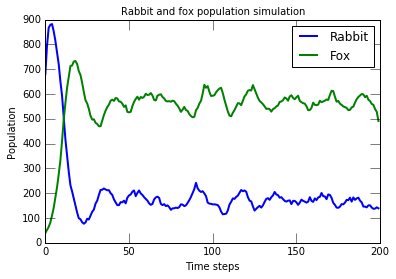

In [49]:
MAXRABBITPOP = 1000
CURRENTRABBITPOP = 500
CURRENTFOXPOP = 30
numSteps = 200

# Step 4
rabbitPopulationOverTime, foxPopulationOverTime = runSimulation(numSteps)
plot_population(rabbitPopulationOverTime, foxPopulationOverTime)

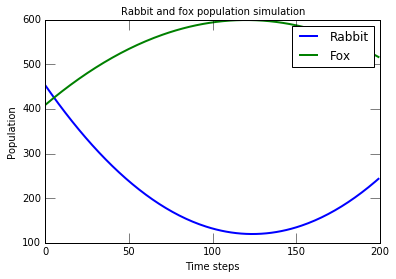

In [50]:
# Step 5
coeffRabbit = pylab.polyfit(range(len(rabbitPopulationOverTime)), rabbitPopulationOverTime, 2)
coeffFox = pylab.polyfit(range(len(foxPopulationOverTime)), foxPopulationOverTime, 2)
rabbits = pylab.polyval(coeffRabbit, range(len(rabbitPopulationOverTime)))
foxes = pylab.polyval(coeffFox, range(len(foxPopulationOverTime)))
plot_poulation(rabbits, foxes)

## Problem 3-5

(1 point possible)<br>
Changing the initial conditions from 500 rabbits and 30 foxes to 50 rabbits and 300 foxes changes the general shapes of both the `polyfit` curves for the rabbit population and fox population.

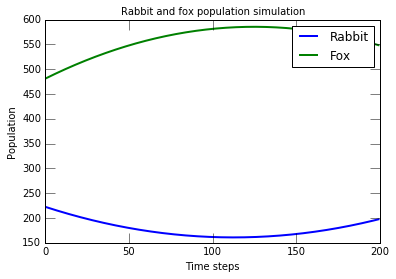

In [51]:
MAXRABBITPOP = 1000
CURRENTRABBITPOP = 50
CURRENTFOXPOP = 300
numSteps = 200

rabbitPopulationOverTime, foxPopulationOverTime = runSimulation(numSteps)
coeffRabbit = pylab.polyfit(range(len(rabbitPopulationOverTime)), rabbitPopulationOverTime, 2)
coeffFox = pylab.polyfit(range(len(foxPopulationOverTime)), foxPopulationOverTime, 2)
rabbits = pylab.polyval(coeffRabbit, range(len(rabbitPopulationOverTime)))
foxes = pylab.polyval(coeffFox, range(len(foxPopulationOverTime)))
plot_poulation(rabbits, foxes)

## Problem 3-6

(1 point possible)<br>
Let's say we make a change in the original simulation. That is, we are going to change one detail in the original simulation, but everything else will remain the same as it was explained in Problem 3 - Part A.

Now, if a fox fails in hunting, it has a 90 percent chance of dying (instead of a 10 percent chance, as in the original simulation).

Changing the probability of an unsuccessful fox dying from 10% to 90% changes the general shapes of both the polyfit curves for the rabbit population and fox population.

In [52]:
def foxGrowth():
    """ 
    foxGrowth is called once at the end of each time step.

    It makes use of the global variables: CURRENTFOXPOP and CURRENTRABBITPOP,
        and both may be modified by this procedure.

    Each fox, based on the probabilities in the problem statement, may eat 
      one rabbit (but only if there are more than 10 rabbits).

    If it eats a rabbit, then with a 1/3 prob it gives birth to a new fox.

    If it does not eat a rabbit, then with a 1/10 prob it dies.

    Nothing is returned.
    """
    # you need these lines for modifying global variables
    global CURRENTRABBITPOP
    global CURRENTFOXPOP

    nb_foxes = CURRENTFOXPOP
    for fox in range(nb_foxes):
        prob = float(CURRENTRABBITPOP)/MAXRABBITPOP
        if prob > random.random() and CURRENTRABBITPOP > 10:
            CURRENTRABBITPOP -= 1
            prob_birth = float(1)/3
            if prob_birth > random.random():
                CURRENTFOXPOP += 1
        else:
            prob_die = float(9)/10
            if prob_die > random.random() and CURRENTFOXPOP > 10:
                CURRENTFOXPOP -= 1

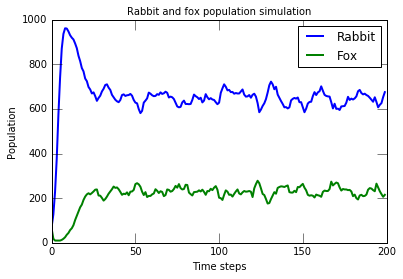

In [55]:
MAXRABBITPOP = 1000
CURRENTRABBITPOP = 50
CURRENTFOXPOP = 300
numSteps = 200

# Step 4
rabbitPopulationOverTime, foxPopulationOverTime = runSimulation(numSteps)
plot_population(rabbitPopulationOverTime, foxPopulationOverTime)

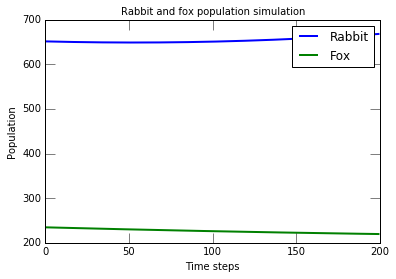

In [56]:
rabbitPopulationOverTime, foxPopulationOverTime = runSimulation(numSteps)
coeffRabbit = pylab.polyfit(range(len(rabbitPopulationOverTime)), rabbitPopulationOverTime, 2)
coeffFox = pylab.polyfit(range(len(foxPopulationOverTime)), foxPopulationOverTime, 2)
rabbits = pylab.polyval(coeffRabbit, range(len(rabbitPopulationOverTime)))
foxes = pylab.polyval(coeffFox, range(len(foxPopulationOverTime)))
plot_poulation(rabbits, foxes)